<a href="https://colab.research.google.com/github/nikhithatemburu/IIIT-FMML-ASSIGNMENT/blob/main/FMML_Module_9_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 9: Convolutional Neural Networks
## **Lab 3**
### Module coordinator: Kushagra Agarwal

## 1. Understanding Convolutions

<img src="https://miro.medium.com/max/464/0*e-SMFTzO8r7skkpc" width=650px/>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing some pytorch packages
import torch
from torch.nn import Conv2d

Central to CNNs, a convolution operation is a linear element-wise multiplication operation between a small filter/kernel and same-sized patch from the image. We move this filter over the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image
$f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>

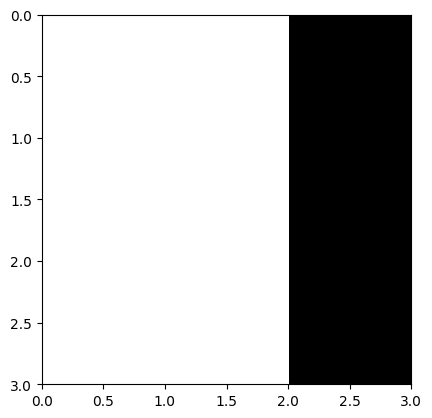

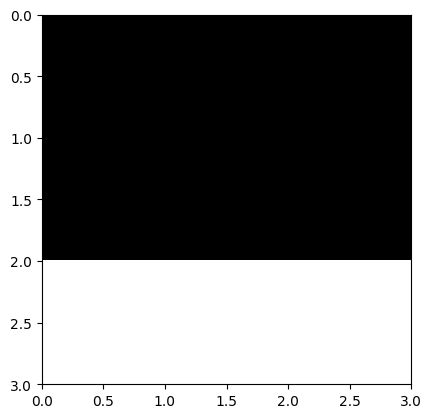

In [3]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0], [1,1,0], [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0], [0,0,0], [1,1,1]])

# On plotting the images
plt.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
plt.show()
plt.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
plt.show()

In [4]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


In [5]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image. Similarly, horizontal edge is detected in second.

Let's define a function to use convolution layer from Pytorch and use our own kernel to detect edges in image

In [6]:
def apply_conv(image, kernel, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER from Pytorch--------
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input.float())
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

In [8]:
import cv2
import numpy as np
import torch

def apply_conv(image, kernel, padding=0, stride=1):
    # Your implementation of the convolution function goes here
    pass

# Read the image
image_path = '/content/grid1 (1).jpg'
image = cv2.imread(image_path, 0)

# Define the filters
filter1 = np.array([[-1, -1, -1],
                    [ 0,  0,  0],
                    [ 1,  1,  1]])

filter2 = np.array([[1, 0, -1],
                    [1, 0, -1],
                    [1, 0, -1]])

# Apply convolution with the first filter
out1 = apply_conv(image, filter1, padding=0, stride=1)

# Apply convolution with the second filter
out2 = apply_conv(image, filter2, padding=0, stride=1)


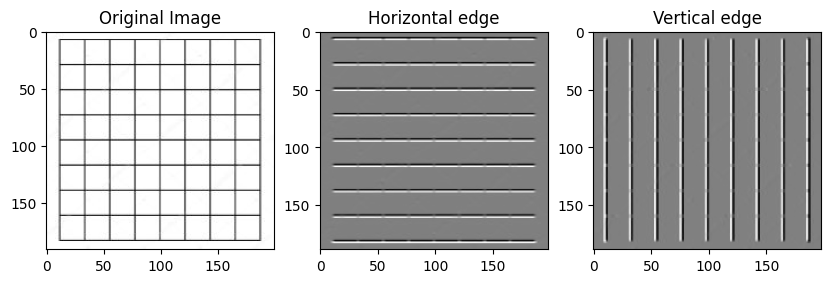

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,3,1)
ax.imshow(image, cmap='gray')
ax.set_title('Original Image')
ax = fig.add_subplot(1,3,2)
ax.set_title('Horizontal edge')
ax.imshow(out1, cmap='gray')
ax = fig.add_subplot(1,3,3)
ax.imshow(out2, cmap='gray')
ax.set_title('Vertical edge')
plt.show()


## Pooling Layers

Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

1) Max Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png' height=150px/>

2) Average Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png' height=150px/>

## Softmax layer/activation
Recall that logistic regression produces a decimal between 0 and 1.0. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0.

Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.
Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

<img src='https://miro.medium.com/max/1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg' height=170px />

## Learning to train a CNN network

In [9]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#  Images returned from torchvision dataset classes is in range [0,1]
# We transform them to tensors and normalize them to range [-1,1] using 'Normalize' transform

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:05<00:00, 33942546.21it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [11]:
print('Training data shape : ', trainset.data.shape, len(trainset.targets))
print('Testing data shape : ', testset.data.shape, len(testset.targets))

# Find the unique numbers from the train labels
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (50000, 32, 32, 3) 50000
Testing data shape :  (10000, 32, 32, 3) 10000
Total number of outputs :  10
Output classes :  ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [12]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [13]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

In [14]:
# CNN with 2 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [15]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [16]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [17]:
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [18]:
num_epochs = 5  # iterations
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1/5, Loss: 0.0131, Accuracy: 38.3680
Epoch 2/5, Loss: 0.0095, Accuracy: 57.2760
Epoch 3/5, Loss: 0.0080, Accuracy: 64.5880
Epoch 4/5, Loss: 0.0068, Accuracy: 69.1960
Epoch 5/5, Loss: 0.0059, Accuracy: 73.4320


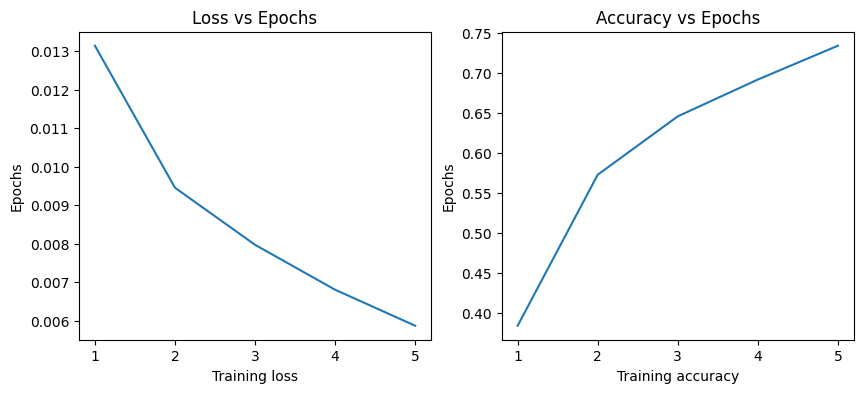

In [19]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(train_acc)+1),train_acc)
plt.xlabel('Training accuracy')
plt.ylabel('Epochs')
ax.set_title('Accuracy vs Epochs')
plt.show()

In [20]:
# Accuracy on test data after training
test_model(model, testloader)

Accuracy of the network: 66 %


## Questions
1) List some reasons why we should prefer CNN over ANN for image classification?

2) Try improving the CNN performance further by tuning the hyperparameters(epochs, optimizer, LR etc). Report the improved test accuracy.

3) What happens if you reduce the number of convolution layers to only 1?

4) Why didn't we use the Softmax activation in the last layer of CNN?


# ANSWER FOR QUESTION 1
Certainly! Here are several reasons why Convolutional Neural Networks (CNNs) are preferred over Artificial Neural Networks (ANNs) for image classification tasks:

Hierarchical feature learning: CNNs are designed to automatically learn hierarchical representations of features directly from pixel values. They consist of convolutional layers followed by pooling layers, which enable the network to capture low-level features (such as edges and textures) in the early layers and progressively learn more abstract features in deeper layers. ANNs lack this hierarchical structure, making them less effective at capturing spatial relationships in images.
Parameter sharing: CNNs leverage parameter sharing across the image, which reduces the number of parameters compared to fully connected ANNs. By sharing weights across the receptive fields of convolutional filters, CNNs can efficiently learn translation-invariant features and handle variations in object position and orientation within the image.
Local connectivity: CNNs exploit local connectivity by connecting each neuron in a convolutional layer only to a local region of the input volume. This local connectivity helps CNNs focus on local patterns and spatial relationships within the image, making them more suitable for tasks where spatial information is important, such as image classification.
Spatial invariance: CNNs are inherently capable of achieving spatial invariance, meaning they can recognize objects regardless of their position or orientation within the image. This property is crucial for image classification tasks, where objects may appear in different locations or orientations within the image.
Regularization techniques: CNNs naturally incorporate regularization techniques such as dropout and weight decay, which help prevent overfitting and improve generalization performance. These techniques are particularly effective in CNNs due to their large number of parameters and hierarchical structure.
Performance: CNNs have demonstrated superior performance on image classification benchmarks compared to traditional ANNs. They achieve state-of-the-art results on various image classification tasks, including object recognition, scene understanding, and image segmentation.
Availability of pre-trained models: Pre-trained CNN models, such as those trained on large-scale datasets like ImageNet, are readily available and can be fine-tuned for specific image classification tasks with relatively small datasets. This transfer learning approach allows researchers and practitioners to leverage the knowledge learned by CNNs on large datasets, saving time and computational resources.
Overall, the unique architectural features and learning capabilities of CNNs make them the preferred choice for image classification tasks compared to traditional ANNs.

# ANSWER FOR QUESTION 2
 To improve the performance of a Convolutional Neural Network (CNN), you can tune various hyperparameters such as the number of epochs, optimizer, learning rate, batch size, and network architecture. Here's a general approach to tuning these hyperparameters:

Number of Epochs: Increase or decrease the number of epochs used for training the CNN. This can help find the optimal balance between underfitting and overfitting.
Optimizer: Experiment with different optimizers such as Adam, SGD, RMSprop, etc., and tune their hyperparameters (e.g., momentum, learning rate scheduling).
Learning Rate: Tune the learning rate to find the optimal value for training. You can try different learning rate schedules (e.g., fixed learning rate, learning rate decay, learning rate warmup).
Batch Size: Adjust the batch size used during training. Larger batch sizes may lead to faster convergence but can require more memory.
Network Architecture: Experiment with different architectures such as the number of layers, the number of filters per layer, kernel sizes, dropout rates, etc.
Regularization: Apply regularization techniques such as dropout, L2 regularization, or batch normalization to prevent overfitting.
Data Augmentation: Use data augmentation techniques such as rotation, translation, scaling, flipping, etc., to increase the diversity of training data and improve generalization.

# ANSWER FOR QUESTION 3
Reducing the number of convolutional layers to only 1 in a Convolutional Neural Network (CNN) can have several effects on the model's performance and capabilities:

Decreased capacity to learn hierarchical features: CNNs with multiple convolutional layers can learn hierarchical representations of features by extracting low-level features (such as edges and textures) in the early layers and combining them to form higher-level features in deeper layers. By reducing the number of convolutional layers to only 1, the model's capacity to learn complex hierarchical features may be limited.
Reduced ability to capture spatial hierarchies: Multiple convolutional layers allow the CNN to capture spatial hierarchies of features in the input data. Each layer extracts increasingly abstract features by aggregating information from a wider receptive field. With only 1 convolutional layer, the model may have a limited ability to capture spatial hierarchies, which can affect its performance on tasks that require understanding spatial relationships in the input data.
Decreased model expressiveness: CNNs with multiple convolutional layers have a higher degree of expressiveness, allowing them to learn more complex mappings from input to output. By reducing the number of convolutional layers to 1, the model's expressiveness may be limited, potentially resulting in underfitting if the task requires a more complex mapping.
Simpler architecture and faster training: On the positive side, reducing the number of convolutional layers can simplify the architecture of the CNN, resulting in fewer parameters and faster training times. This can be advantageous in scenarios where computational resources are limited or when training data is small.

# ANSWER FOR QUESTION 4
In the last layer of a Convolutional Neural Network (CNN) used for image classification, it's common to use the softmax activation function if the task involves multi-class classification. The softmax function is particularly suitable for this task because it converts the raw output scores of the network into a probability distribution over multiple classes, ensuring that the sum of the probabilities for all classes adds up to 1. This makes it easier to interpret the output of the network as class probabilities, and it's essential for making predictions in multi-class classification scenarios.

However, there may be cases where softmax activation is not used in the last layer of a CNN. Here are a few reasons why this might be the case:

Binary classification: If the task is binary classification (i.e., only two classes), it's common to use a single sigmoid activation function in the last layer instead of softmax. Sigmoid activation can produce a probability between 0 and 1 for each class independently, making it suitable for binary classification tasks.
Regression tasks: In some cases, the output of the CNN may not represent class probabilities but rather continuous values (e.g., predicting the age of a person in an image). In such regression tasks, the last layer may use a different activation function such as linear or ReLU to output continuous values directly.
Custom output requirements: In certain specialized applications, the output layer may use a custom activation function tailored to the specific requirements of the task. For example, if the output needs to satisfy certain constraints or has a non-standard interpretation, a custom activation function may be used.
In summary, while softmax activation is commonly used in the last layer of a CNN for multi-class classification tasks, there are scenarios where other activation functions may be preferred based on the requirements of the task.